<a href="https://colab.research.google.com/github/AndBalbino/Fase2_AulasFiap-ML/blob/main/Fase2_Aula2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nova seção

# Modelos de classificação

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df_gaf = pd.read_excel('/content/gaf_esp.xlsx')

In [3]:
df_gaf.head()

,Espécie,Comprimento do Abdômen,Comprimento das Antenas
0,Gafanhoto,0.50,7.0
1,Gafanhoto,0.50,6.0
2,Gafanhoto,0.60,5.5
3,Gafanhoto,0.65,4.5
4,Gafanhoto,0.54,3.2


In [4]:
df_gaf.describe()

,Comprimento do Abdômen,Comprimento das Antenas
count,100.000000,100.000000
mean,4.936200,5.382400
std,3.343806,2.296001
min,0.500000,0.890000
25%,1.692500,3.775000
50%,4.500000,5.500000
75%,8.200000,7.000000
max,10.000000,9.700000


In [5]:
df_gaf.shape

(100, 3)

In [6]:
df_gaf.groupby('Espécie').describe()

Comprimento do Abdômen                                              \
                           count    mean       std  min    25%    50%    75%   
Espécie                                                                        
Esperança                   50.0  8.1206  1.129729  5.4  7.225  8.200  9.000   
Gafanhoto                   50.0  1.7518  0.786941  0.5  1.200  1.685  2.415   

                Comprimento das Antenas                                       \
            max                   count    mean       std   min    25%   50%   
Espécie                                                                        
Esperança  10.0                    50.0  7.2156  1.334945  4.50  6.205  7.00   
Gafanhoto   3.6                    50.0  3.5492  1.417861  0.89  2.550  3.77   

                     
           75%  max  
Espécie              
Esperança  8.2  9.7  
Gafanhoto  4.3  7.0

<Axes: xlabel='Comprimento do Abdômen', ylabel='Comprimento das Antenas'>

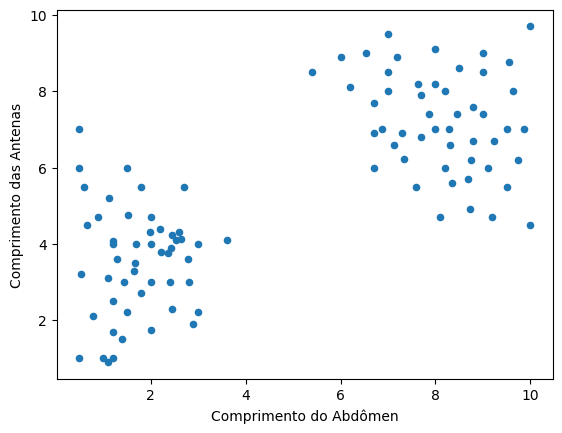

In [7]:
df_gaf.plot.scatter(x='Comprimento do Abdômen', y='Comprimento das Antenas')

### Separando os dados

In [8]:
## Separando a base de dados
from sklearn.model_selection import train_test_split

In [9]:
x = df_gaf[['Comprimento do Abdômen', 'Comprimento das Antenas']]
y = df_gaf['Espécie']

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42) # Stratify = equilibra a base ambos iguais

In [11]:
len(x_train)

80

In [12]:
len(x_test)

20

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
modelo_classificador = KNeighborsClassifier(n_neighbors=3)

In [15]:
modelo_classificador.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [16]:
modelo_classificador.predict([[4,6]]) # Predição para teste

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Gafanhoto'], dtype=object)

In [17]:
y_predito = modelo_classificador.predict(x_test)

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
accuracy_score(y_true = y_test, y_pred= y_predito)

1.0

# KNN e SVM

#### Recrutamento preditivo - ML de ponta a ponta

In [20]:
df_recrutamento = pd.read_excel('/content/Recrutamento.xlsx')

In [21]:
df_recrutamento.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Yes,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Yes,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Yes,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,No,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Yes,425000.0


In [22]:
df_recrutamento.shape

(215, 15)

In [23]:
set(df_recrutamento.status)

{'No', 'Yes'}

In [24]:
df_recrutamento.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [25]:
df_recrutamento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [26]:
import matplotlib.pyplot as plt

<Axes: >

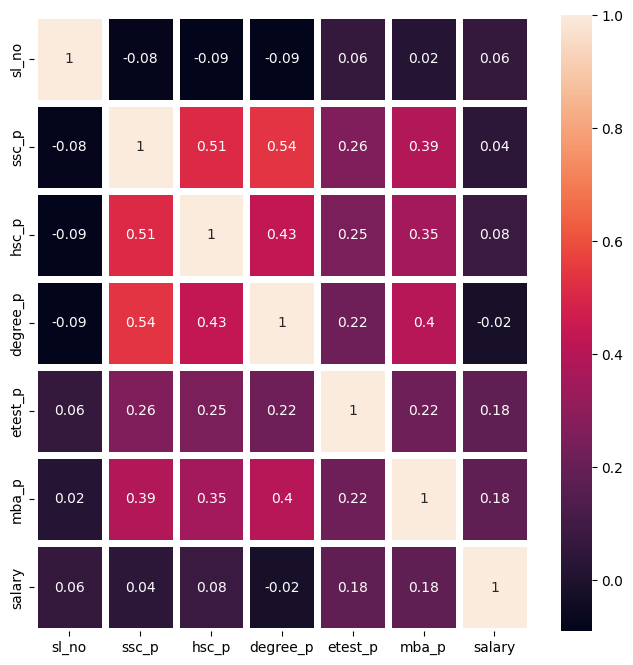

In [27]:
correlation_matriz = df_recrutamento.select_dtypes(include=['number']).corr().round(2)

fig, ax = plt.subplots(figsize=(8,8))

sns.heatmap(data = correlation_matriz, annot = True, linewidths=5, ax=ax)

# Matriz de correlação

### Label Encoding e One Hot Encoding

In [28]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [29]:
df_recrutamento.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Yes,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Yes,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Yes,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,No,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Yes,425000.0


In [30]:
# LE -> Cada categoria em um número inteiro
# OHE -> Cria uma coluna nova para cada categoria

colunas = ['gender', 'workex', 'specialisation', 'status']
label_encoder = LabelEncoder()

for col in colunas:
  df_recrutamento[col] = label_encoder.fit_transform(df_recrutamento[col])

In [31]:
df_recrutamento.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,0,55.0,1,58.80,1,270000.0
1,2,1,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,1,86.5,0,66.28,1,200000.0
2,3,1,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,0,75.0,0,57.80,1,250000.0
3,4,1,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,0,66.0,1,59.43,0,NaN
4,5,1,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,0,96.8,0,55.50,1,425000.0


In [32]:
dummy_hsc_s = pd.get_dummies(df_recrutamento['hsc_s'], prefix='dummy', dtype=int)
dummy_degree_t = pd.get_dummies(df_recrutamento['degree_t'], prefix='dummy', dtype=int)

df_dummy = pd.concat([df_recrutamento, dummy_hsc_s, dummy_degree_t], axis=1)


In [33]:
df_dummy.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,...,specialisation,mba_p,status,salary,dummy_Arts,dummy_Commerce,dummy_Science,dummy_Comm&Mgmt,dummy_Others,dummy_Sci&Tech
0,1,1,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,0,...,1,58.80,1,270000.0,0,1,0,0,0,1
1,2,1,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,1,...,0,66.28,1,200000.0,0,0,1,0,0,1
2,3,1,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,0,...,0,57.80,1,250000.0,1,0,0,1,0,0
3,4,1,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,0,...,1,59.43,0,NaN,0,0,1,0,0,1
4,5,1,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,0,...,0,55.50,1,425000.0,0,1,0,1,0,0


In [34]:
df_dummy.drop(['hsc_s', 'degree_t', 'salary'], axis=1, inplace=True)

In [35]:
df_dummy.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,dummy_Arts,dummy_Commerce,dummy_Science,dummy_Comm&Mgmt,dummy_Others,dummy_Sci&Tech
0,1,1,67.00,Others,91.00,Others,58.00,0,55.0,1,58.80,1,0,1,0,0,0,1
1,2,1,79.33,Central,78.33,Others,77.48,1,86.5,0,66.28,1,0,0,1,0,0,1
2,3,1,65.00,Central,68.00,Central,64.00,0,75.0,0,57.80,1,1,0,0,1,0,0
3,4,1,56.00,Central,52.00,Central,52.00,0,66.0,1,59.43,0,0,0,1,0,0,1
4,5,1,85.80,Central,73.60,Central,73.30,0,96.8,0,55.50,1,0,1,0,1,0,0


<Axes: >

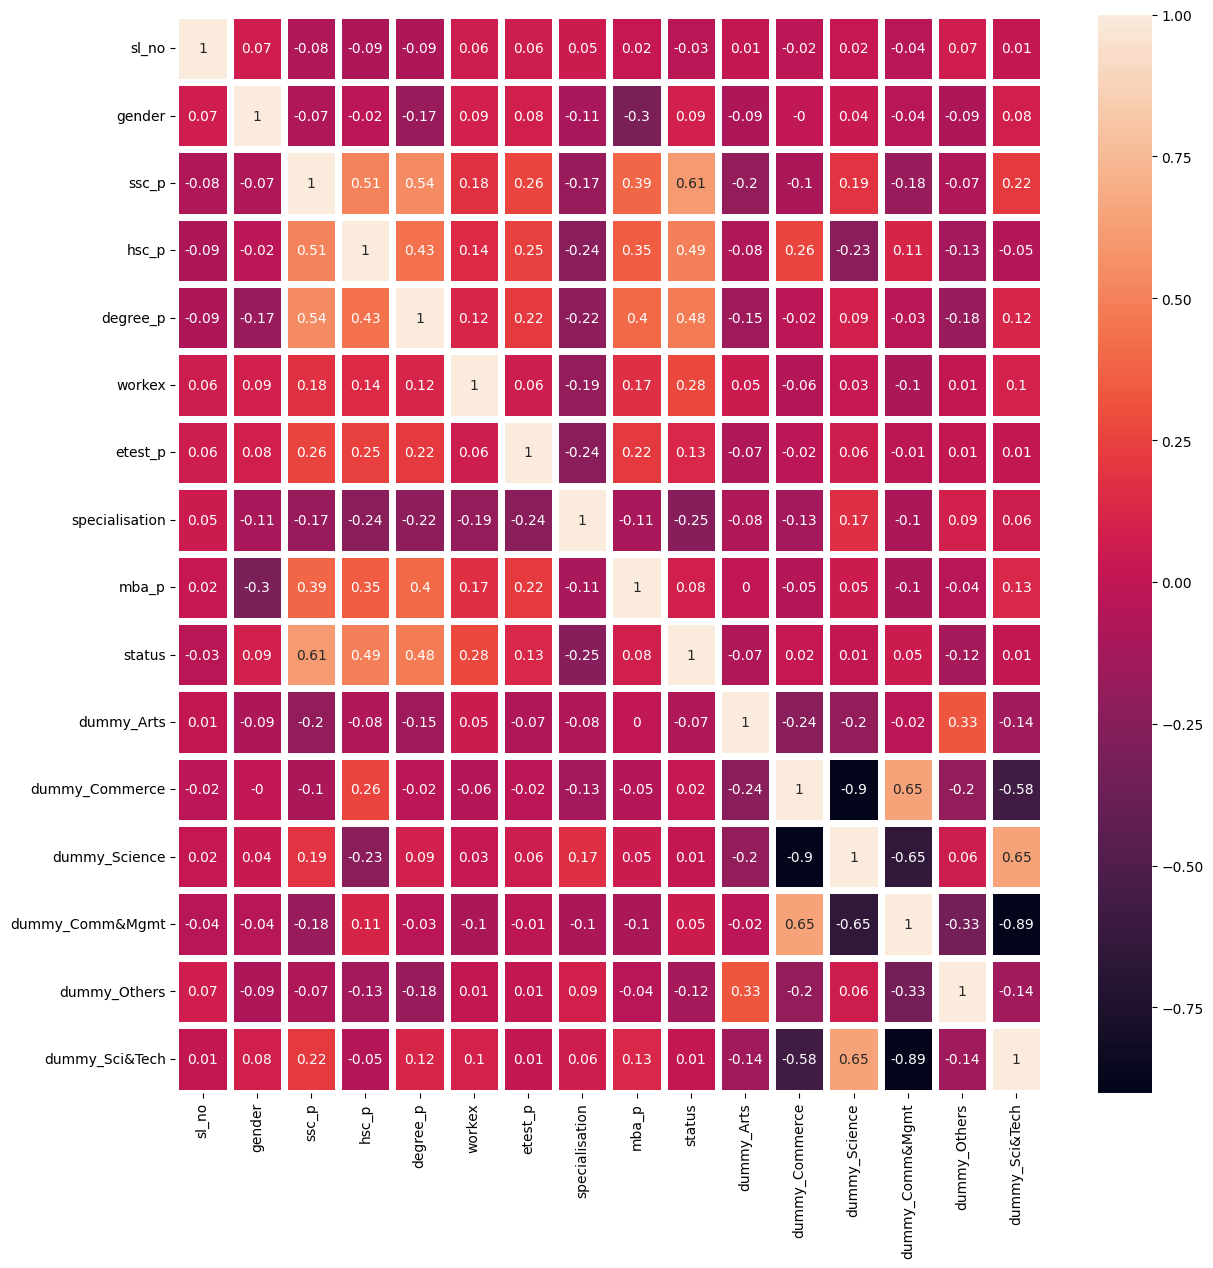

In [36]:
correlation_matriz = df_dummy.select_dtypes(include=['number']).corr().round(2)

fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(data = correlation_matriz, annot = True, linewidths=5, ax=ax)

### Construção do modelo de ML

In [37]:
x = df_dummy[['ssc_p', 'hsc_p', 'degree_p', 'workex', 'mba_p']]
y = df_dummy['status']

In [38]:
x

,ssc_p,hsc_p,degree_p,workex,mba_p
0,67.00,91.00,58.00,0,58.80
1,79.33,78.33,77.48,1,66.28
2,65.00,68.00,64.00,0,57.80
3,56.00,52.00,52.00,0,59.43
4,85.80,73.60,73.30,0,55.50
...,...,...,...,...,...
210,80.60,82.00,77.60,0,74.49
211,58.00,60.00,72.00,0,53.62
212,67.00,67.00,73.00,1,69.72
213,74.00,66.00,58.00,0,60.23


In [114]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

In [41]:
x_train.shape

(172, 5)

In [42]:
x_test.shape

(43, 5)

#### Padronização e Normalização

In [43]:
import numpy as np

np.set_printoptions(suppress=True)

In [44]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [45]:
scaler = StandardScaler()

scaler.fit(x_train)

x_train_escalonado = scaler.transform(x_train)
x_test_escalonado = scaler.transform(x_test)

In [46]:
x_train_escalonado

array([[ 0.2607293 ,  0.69412021, -0.16676782, -0.77940787,  0.00078869],
       [-1.06575905, -1.40543063, -1.19212641, -0.77940787,  0.07447794],
       [-0.66412785, -2.21238844, -0.67807997, -0.77940787,  0.53671051],
       [ 0.7121038 , -0.85772172, -0.57691126,  1.28302527, -0.25042466],
       [-0.38409143,  0.05512648, -0.03005334, -0.77940787, -0.76792417],
       [-0.56832592,  1.42439877,  0.3800901 , -0.77940787, -0.66408932],
       [-0.75256041, -0.21872798, -1.12376917, -0.77940787, -1.16819078],
       [ 0.16861205, -0.58386726, -0.16676782, -0.77940787, -1.58520494],
       [-0.06168107,  0.03686951,  0.42110444,  1.28302527,  1.46117565],
       [ 0.2607293 , -0.3100128 , -0.03005334, -0.77940787, -0.36263329],
       [-1.48949838, -2.04442437, -1.26048365, -0.77940787, -1.81297172],
       [ 1.33850107, -0.3100128 ,  0.10666114,  1.28302527,  1.3271952 ],
       [ 0.21467067,  0.32898094,  0.79023354, -0.77940787, -1.25192856],
       [ 1.64248799, -0.58386726,  0.9

In [47]:
import numpy as np

print("Média por coluna:", np.mean(x_train_escalonado, axis=0))
print("Desvio padrão por coluna:", np.std(x_train_escalonado, axis=0))


Média por coluna: [-0. -0.  0. -0.  0.]
Desvio padrão por coluna: [1. 1. 1. 1. 1.]


In [48]:
error = []

for i in range(1,10):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train_escalonado, y_train)
  pred_i = knn.predict(x_test_escalonado)
  error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Erro')

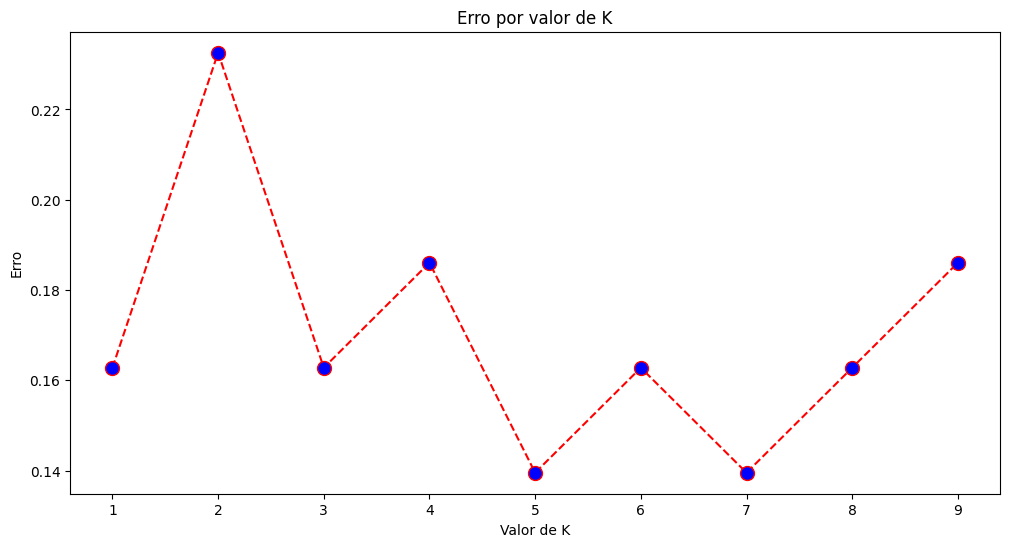

In [49]:
plt.figure(figsize=(12,6))
plt.plot(range(1,10), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Erro por valor de K')
plt.xlabel('Valor de K')
plt.ylabel('Erro')

In [50]:
modelo_classificador = KNeighborsClassifier(n_neighbors=5)

modelo_classificador.fit(x_train_escalonado, y_train)

y_predito = modelo_classificador.predict(x_test_escalonado)

In [51]:
y_predito

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0])

In [124]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [53]:
print(accuracy_score(y_test, y_predito))

0.8604651162790697


In [54]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

In [55]:
svm = Pipeline(
    [
        ('linear_svc', LinearSVC(C=1))
    ]
)

In [56]:
svm.fit(x_train_escalonado, y_train)

Pipeline(steps=[('linear_svc', LinearSVC(C=1))])

In [57]:
y_predito_svm = svm.predict(x_test_escalonado)

In [58]:
print(accuracy_score(y_test, y_predito_svm))

0.8604651162790697


# K-Means

In [59]:
from matplotlib import colors

# Algoritmos de agrupamento
from sklearn.cluster import KMeans, DBSCAN

# Avaliando o desempenho
from sklearn.metrics import adjusted_rand_score, silhouette_score

### Algumas das principais técnicas de clusterização

In [60]:
df_mall = pd.read_csv('/content/mall.csv', sep=',')
df_mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [61]:
df_mall.shape

(200, 5)

### Limpeza dos dados

In [62]:
df_mall.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


### Análise exploratória dos dados


*   Conhecer os dados, identificar padrões, encontra anomalias, etc.

In [63]:
df_mall.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [64]:
df_mall['Annual Income (k$)'].median()

61.5

### Analisando a distribuição das variáveis:

array([[<Axes: title={'center': 'CustomerID'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Annual Income (k$)'}>,
        <Axes: title={'center': 'Spending Score (1-100)'}>]], dtype=object)

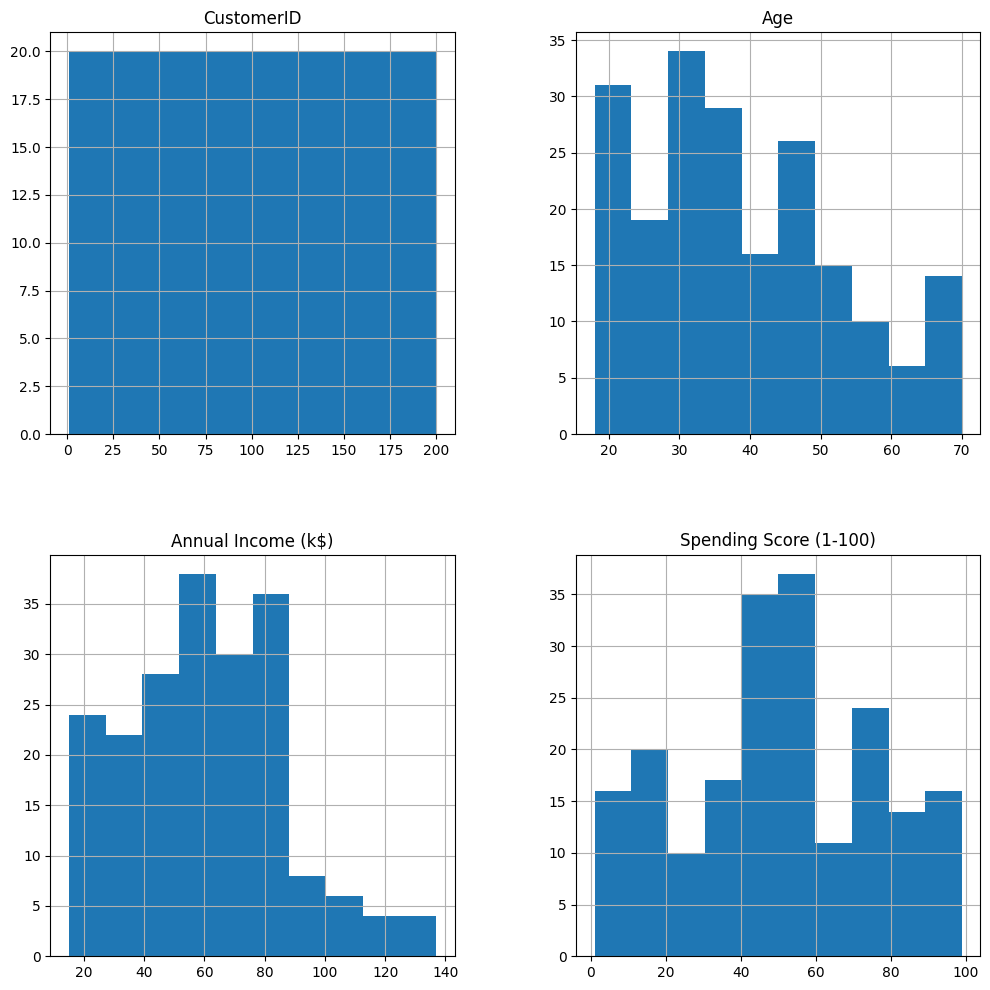

In [65]:
df_mall.hist(figsize=(12,12))

### Analisando a correlação entre as variáveis:

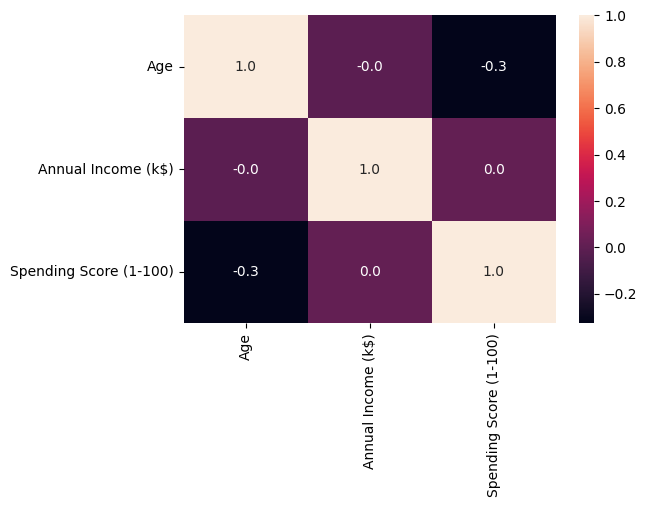

In [66]:
plt.figure(figsize=(6,4))
sns.heatmap(df_mall[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr(method='pearson'), annot=True, fmt='.1f');

### Analisando a proporção entre gêneros:

In [67]:
df_mall['Gender'].value_counts()

,count
Gender,
Female,112
Male,88


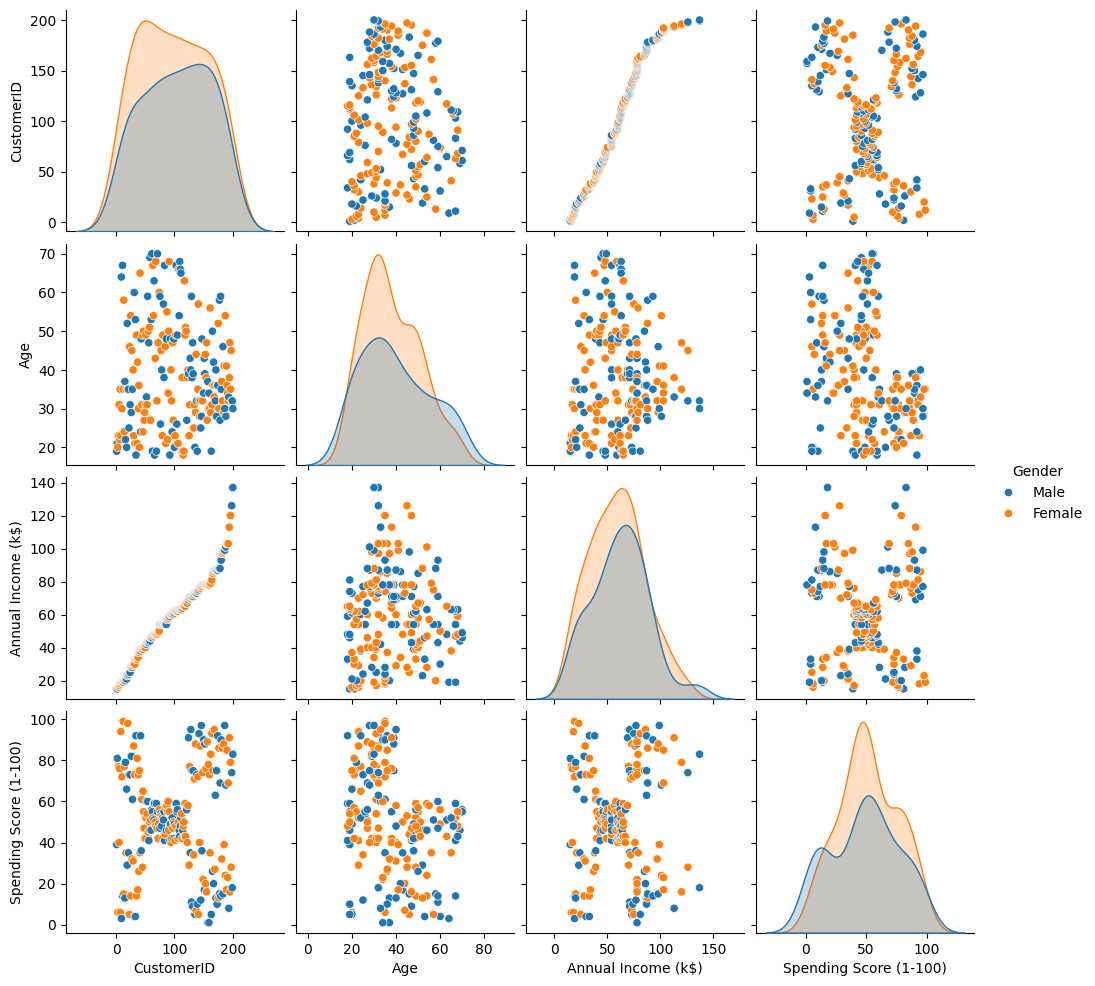

In [68]:
sns.pairplot(df_mall, hue='Gender')
plt.show()

### Feature scalling

In [69]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
#scaler = MinMaxScaler()
scaler.fit(df_mall[['Annual Income (k$)', 'Spending Score (1-100)']])

StandardScaler()

In [70]:
dados_escalados = scaler.transform(df_mall[['Annual Income (k$)', 'Spending Score (1-100)']])

In [71]:
dados_escalados

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

### Criando os agrupamentos
* K-Means

#### Executando o algoritmo sem feature scalling

In [72]:
# Definindo o modelo de clusterização, K-Means com 6 clusters
kmeans = KMeans(n_clusters = 6, random_state=0) # Definindo os hiperparametros do algoritmo (Definir o número de grupo = cluster)

# Implementando o K-Means nos dados:
kmeans.fit(df_mall[['Annual Income (k$)', 'Spending Score (1-100)']])

# Salvando os centroides de cada cluster
centroides = kmeans.cluster_centers_

# Salvando os labels dos clusters para cada exemplo
kmeans_labels = kmeans.predict(df_mall[['Annual Income (k$)', 'Spending Score (1-100)']])

#### Executando com feature scaling

In [73]:
# Definindo o modelo de clusterização K-Means 6 clusters
kmeans_escalonados = KMeans(n_clusters=6, random_state=0)

# Implementando o K-Means nos dados escalonados
kmeans.fit(dados_escalados)

# Salvando os centroides de cada cluster
centroides_escalonados = kmeans.cluster_centers_

# Salvando os labels dos clusters para cada exemplo
kmeans_labels_escalonado = kmeans.predict(dados_escalados)

In [74]:
dados_escalados = pd.DataFrame(dados_escalados, columns = ['Annual Income (k$)', 'Spending Score (1-100)'])

In [75]:
dados_escalados.head()

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [76]:
dados_escalados['Grupos'] = kmeans_labels_escalonado
dados_escalados.head()

,Annual Income (k$),Spending Score (1-100),Grupos
0,-1.738999,-0.434801,3
1,-1.738999,1.195704,5
2,-1.700830,-1.715913,3
3,-1.700830,1.040418,5
4,-1.662660,-0.395980,3


In [77]:
df_mall['Grupos'] = kmeans_labels
df_mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Grupos
0,1,Male,19,15,39,3
1,2,Male,21,15,81,5
2,3,Female,20,16,6,3
3,4,Female,23,16,77,5
4,5,Female,31,17,40,3


#### Vamos analisar a nossa previsão e os centróides:

In [78]:
pd.Series(kmeans_labels).value_counts()

,count
0,49
4,39
1,39
2,32
3,21
5,20


In [79]:
centroides

array([[62.73469388, 46.91836735],
       [86.53846154, 82.12820513],
       [89.40625   , 15.59375   ],
       [25.14285714, 19.52380952],
       [45.51282051, 51.51282051],
       [24.95      , 81.        ]])

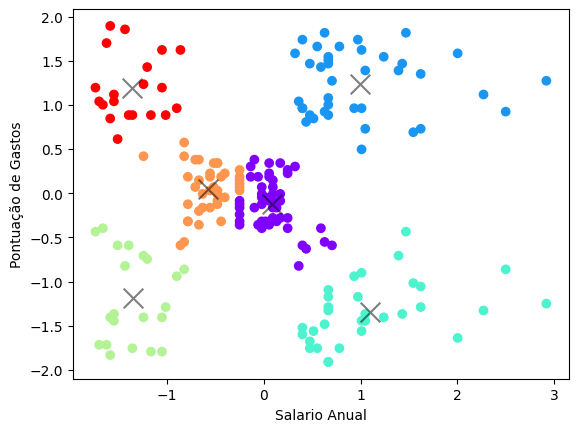

In [80]:
# Plotando os dados identificando com os seus clusters
plt.scatter(dados_escalados[['Annual Income (k$)']], dados_escalados[['Spending Score (1-100)']], c=kmeans_labels_escalonado, cmap='rainbow')
plt.xlabel('Salario Anual')
plt.ylabel('Pontuação de Gastos')

# Plotando os centroides
plt.scatter(centroides_escalonados[:,0], centroides_escalonados[:,1], c='black', marker='x', s=200, alpha=0.5)
plt.rcParams['figure.figsize'] = (10, 5)
plt.show()

#### Clusters sem feature scaling

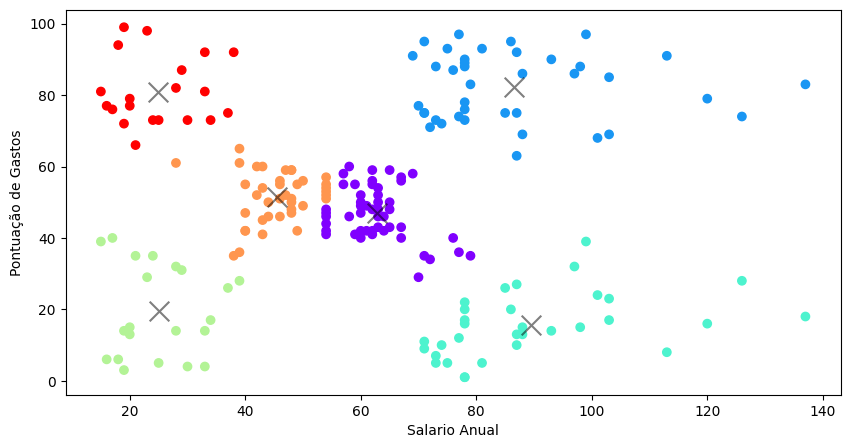

In [81]:
# Plotando os dados identificando com os seus clusters
plt.scatter(df_mall[['Annual Income (k$)']], df_mall[['Spending Score (1-100)']], c=kmeans_labels, cmap='rainbow')
plt.xlabel('Salario Anual')
plt.ylabel('Pontuação de Gastos')

# Plotando os centroides
plt.scatter(centroides[:,0], centroides[:,1], c='black', marker='x', s=200, alpha=0.5)
plt.rcParams['figure.figsize'] = (10,5)
plt.show()

#### Escolhendo a quantidade de grupos usando o método do "Cotovelo"

In [82]:
# Lista com a uantidade de clusters que iremos testar
k = list(range(1,10))
print(k)

[1, 2, 3, 4, 5, 6, 7, 8, 9]


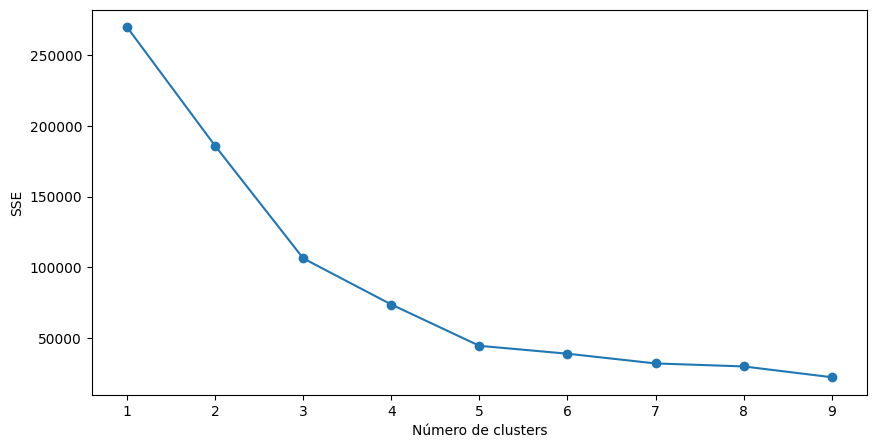

In [83]:
# Armazenando o SSE (soma dos erros quadraticos) para cada quantidade de k
sse = []

for i in k:
  kmeans = KMeans(n_clusters=i, random_state=0)
  kmeans.fit(df_mall[['Annual Income (k$)', 'Spending Score (1-100)']])
  sse.append(kmeans.inertia_) # Calculo do erro do k-mens (mudar o centroide dos dados)


plt.rcParams['figure.figsize'] = (10,5)

# Plota o gráfico com a soma dos erros quadraticos

plt.plot(k, sse, '-o')
plt.xlabel(r'Número de clusters')
plt.ylabel('SSE')
plt.show()


In [84]:
df_mall.groupby('Grupos')['Age'].mean()

,Age
Grupos,
0,41.836735
1,32.692308
2,41.000000
3,44.142857
4,43.820513
5,24.850000


In [85]:
df_mall.groupby('Grupos')['Annual Income (k$)'].mean()

,Annual Income (k$)
Grupos,
0,62.734694
1,86.538462
2,89.406250
3,25.142857
4,45.512821
5,24.950000


In [86]:
# Definindo o modelo de clusterização, K-Means com 7 clusters
kmeans = KMeans(n_clusters=5, random_state=0)

# Implementando o K-Means nos dados
kmeans.fit(df_mall[['Annual Income (k$)', 'Spending Score (1-100)']])

# Salvando os centroides de cada cluster
centroides = kmeans.cluster_centers_

# Salvando os labels dos clusters para cada exemplo
kmeans_labels = kmeans.predict(df_mall[['Annual Income (k$)', 'Spending Score (1-100)']])

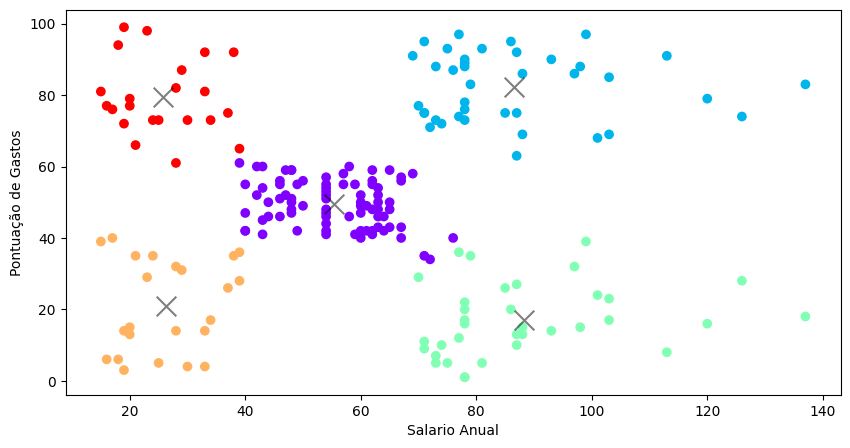

In [87]:
# Plotando os dados identificando com os seus clusters
plt.scatter(df_mall[['Annual Income (k$)']], df_mall[['Spending Score (1-100)']], c=kmeans_labels, cmap='rainbow')
plt.xlabel('Salario Anual')
plt.ylabel('Pontuação de Gastos')

# Plotando os centroides
plt.scatter(centroides[:,0], centroides[:, 1], c='black', marker='x', s=200, alpha=0.5)
plt.rcParams['figure.figsize'] = (10,5)
plt.show()

In [88]:
dados_grupo_1 = df_mall[df_mall['Grupos']==1]
dados_grupo_1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Grupos
123,124,Male,39,69,91,1
125,126,Female,31,70,77,1
127,128,Male,40,71,95,1
129,130,Male,38,71,75,1
131,132,Male,39,71,75,1


In [89]:
dados_grupo_2 = df_mall[df_mall['Grupos']==2]
dados_grupo_2.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Grupos
128,129,Male,59,71,11,2
130,131,Male,47,71,9,2
134,135,Male,20,73,5,2
136,137,Female,44,73,7,2
138,139,Male,19,74,10,2


In [90]:
dados_grupo_1['Annual Income (k$)'].mean()


np.float64(86.53846153846153)

In [91]:
dados_grupo_2['Annual Income (k$)'].mean()


np.float64(89.40625)

In [92]:
dados_grupo_1['Age'].mean()

np.float64(32.69230769230769)

In [93]:
dados_grupo_2['Age'].mean()

np.float64(41.0)

### DBSCAN

In [94]:
# Criando o modelo
dbscan = DBSCAN(eps = 10, min_samples=8) # Mudar para testar
# Ajustando aos dados
dbscan.fit(df_mall[['Annual Income (k$)', 'Spending Score (1-100)']])
dbscan_labels = dbscan.labels_
dbscan_labels

array([-1,  0,  1,  0, -1,  0,  1, -1,  1,  0, -1, -1, -1,  0,  1,  0, -1,
        0, -1, -1, -1,  0,  1,  0,  1,  0, -1, -1,  2,  0,  1,  0,  1, -1,
       -1,  0, -1,  0,  2, -1,  2, -1,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  3,  2,  3,  2,  3,  4,  3,  4,  3,  2,  3,  4,  3,
        4,  3,  4,  3,  4,  3,  2,  3,  4,  3,  2,  3,  4,  3,  4,  3,  4,
        3,  4,  3,  4,  3,  4,  3,  2,  3,  4,  3,  4,  3,  4,  3,  4, -1,
        4,  3,  4,  3,  4,  3,  4,  3,  4,  3, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

#### Labels com -1 foram classificados com outliers

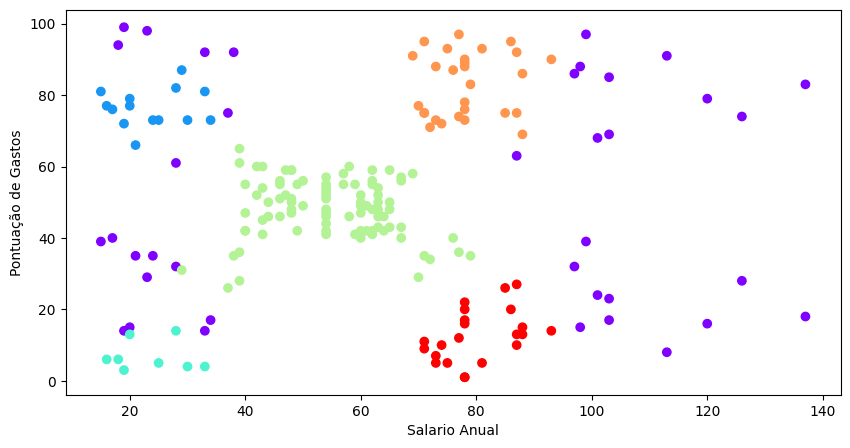

In [95]:
plt.scatter(df_mall[['Annual Income (k$)']], df_mall[['Spending Score (1-100)']], c=dbscan_labels, cmap='rainbow')
plt.xlabel('Salario Anual')
plt.ylabel('Pontuação de Gastos')
plt.show()

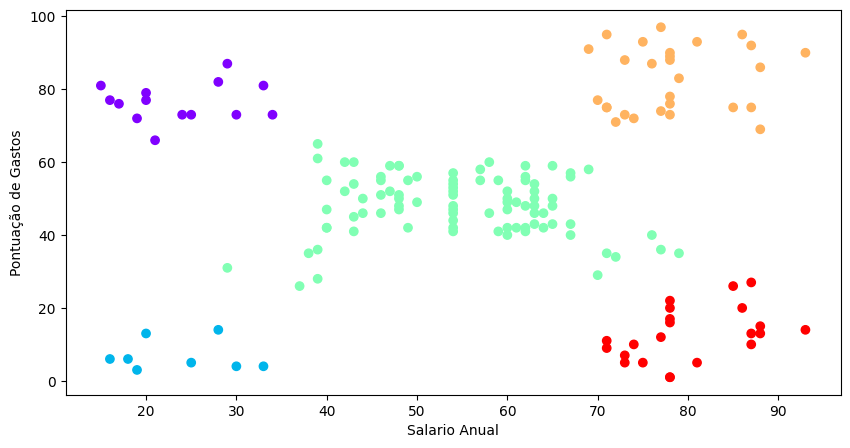

In [96]:
# Plotando o gráfico sem os outliers:
# Mascara oara outliers

mascara = dbscan_labels >= 0

# Plotando o gráfico
plt.scatter(df_mall[mascara][['Annual Income (k$)']], df_mall[mascara][['Spending Score (1-100)']], c=dbscan_labels[mascara], cmap='rainbow')
plt.xlabel('Salario Anual')
plt.ylabel('Pontuação de Gastos')
plt.show()

#### Checando a quantidade de valores que foram classificados como Outliers:

In [97]:
list(mascara).count(False)

38

### Como validar uma clusterização?


Temos dois tipos:
- Interna; Quanto bom foi o meu agrupamento?
- Externa: omo parecido estão os meus dois algoritmos comparados?

In [98]:
adjusted_rand_score(kmeans_labels, dbscan_labels) # Externo:

0.7151933782093212

#### KMEANS:

In [99]:
silhouette_score(df_mall[['Annual Income (k$)', 'Spending Score (1-100)']], kmeans_labels)

np.float64(0.553931997444648)

#### DBSCAN:

In [100]:
silhouette_score(df_mall[['Annual Income (k$)', 'Spending Score (1-100)']], dbscan_labels)

np.float64(0.36328873885121793)

### Segmentação de imagens

In [101]:
from PIL import Image
import glob

import matplotlib.image as mpimg

In [102]:
img_G = mpimg.imread('/content/mdb001.pgm')
img_D = mpimg.imread('/content/mdb003.pgm')
img_F = mpimg.imread('/content/mdb005.pgm')


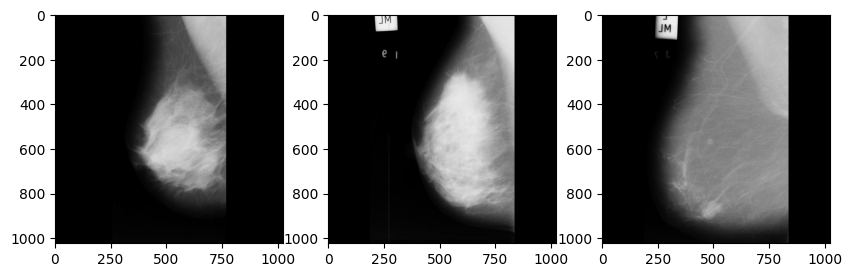

In [103]:
fig, axs = plt.subplots(1,3, figsize=(10,3))
img1 = axs[0].imshow(img_G, cmap='gray', vmin=0, vmax=255)
img2 = axs[1].imshow(img_D, cmap='gray', vmin=0, vmax=255)
img3 = axs[2].imshow(img_F, cmap='gray', vmin=0, vmax=255)
plt.show()

In [104]:
# Essa função usa o KMeans como um filtro de segmentação de imagem

def filtro_kmeans(img, clusters):
  vectorized = img.reshape((-1,1))
  kmeans = KMeans(n_clusters=clusters, random_state=0, n_init=5)
  kmeans.fit(vectorized)

  centers = np.uint8(kmeans.cluster_centers_)
  segmented_data = centers[kmeans.labels_.flatten()] # Flatten = achatar

  segmented_image = segmented_data.reshape((img.shape))
  return segmented_image

In [105]:
clusters = 3

img_G_segmentada = filtro_kmeans(img_G, clusters)
img_D_segmentada = filtro_kmeans(img_D, clusters)
img_F_segmentada = filtro_kmeans(img_F, clusters)

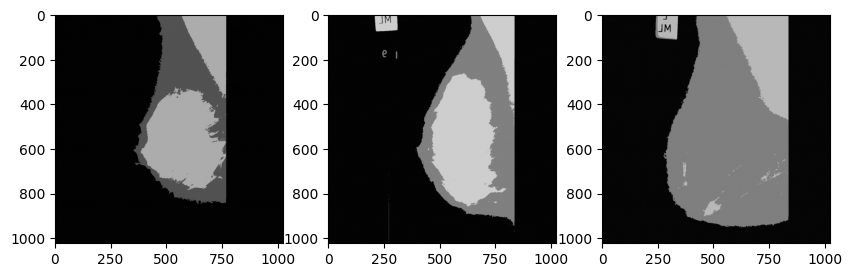

In [106]:
fig, axs = plt.subplots(1,3, figsize=(10,3))
img1 = axs[0].imshow(img_G_segmentada, cmap='gray', vmin=0, vmax=255)
img2 = axs[1].imshow(img_D_segmentada, cmap='gray', vmin=0, vmax=255)
img3 = axs[2].imshow(img_F_segmentada, cmap='gray', vmin=0, vmax=255)
plt.show()
#

### Modelos baseados em árvores

In [109]:
df_card = pd.read_csv('/content/card_transdata.csv', sep=',')
df_card.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [110]:
x = df_card.drop(columns=['fraud'])
y = df_card['fraud']

In [111]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, stratify=y, random_state=7)

#### Criando modelos de árvores:

##### Decision Tree

In [118]:
from sklearn.tree import plot_tree
from sklearn import tree

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz

In [116]:
dt = DecisionTreeClassifier(random_state=7, criterion='entropy', max_depth =2)

In [117]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=7)

In [119]:
y_predito = dt.predict(x_test)

[Text(0.5, 0.8333333333333334, 'x[2] <= 4.0\nentropy = 0.428\nsamples = 800000\nvalue = [730078, 69922]'),
 Text(0.25, 0.5, 'x[0] <= 100.004\nentropy = 0.169\nsamples = 717444\nvalue = [699473, 17971]'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'entropy = 0.052\nsamples = 681683\nvalue = [677647, 4036]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.965\nsamples = 35761\nvalue = [21826, 13935]'),
 Text(0.75, 0.5, 'x[6] <= 0.5\nentropy = 0.951\nsamples = 82556\nvalue = [30605.0, 51951.0]'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.541\nsamples = 29007\nvalue = [25406, 3601]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.46\nsamples = 53549\nvalue = [5199, 48350]')]

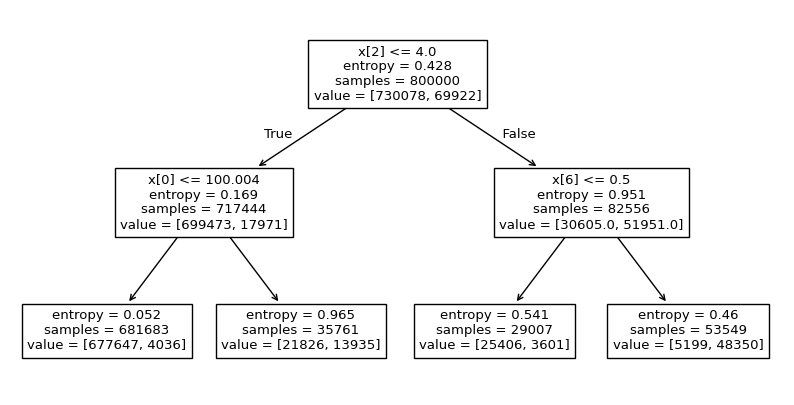

In [120]:
tree.plot_tree(dt)

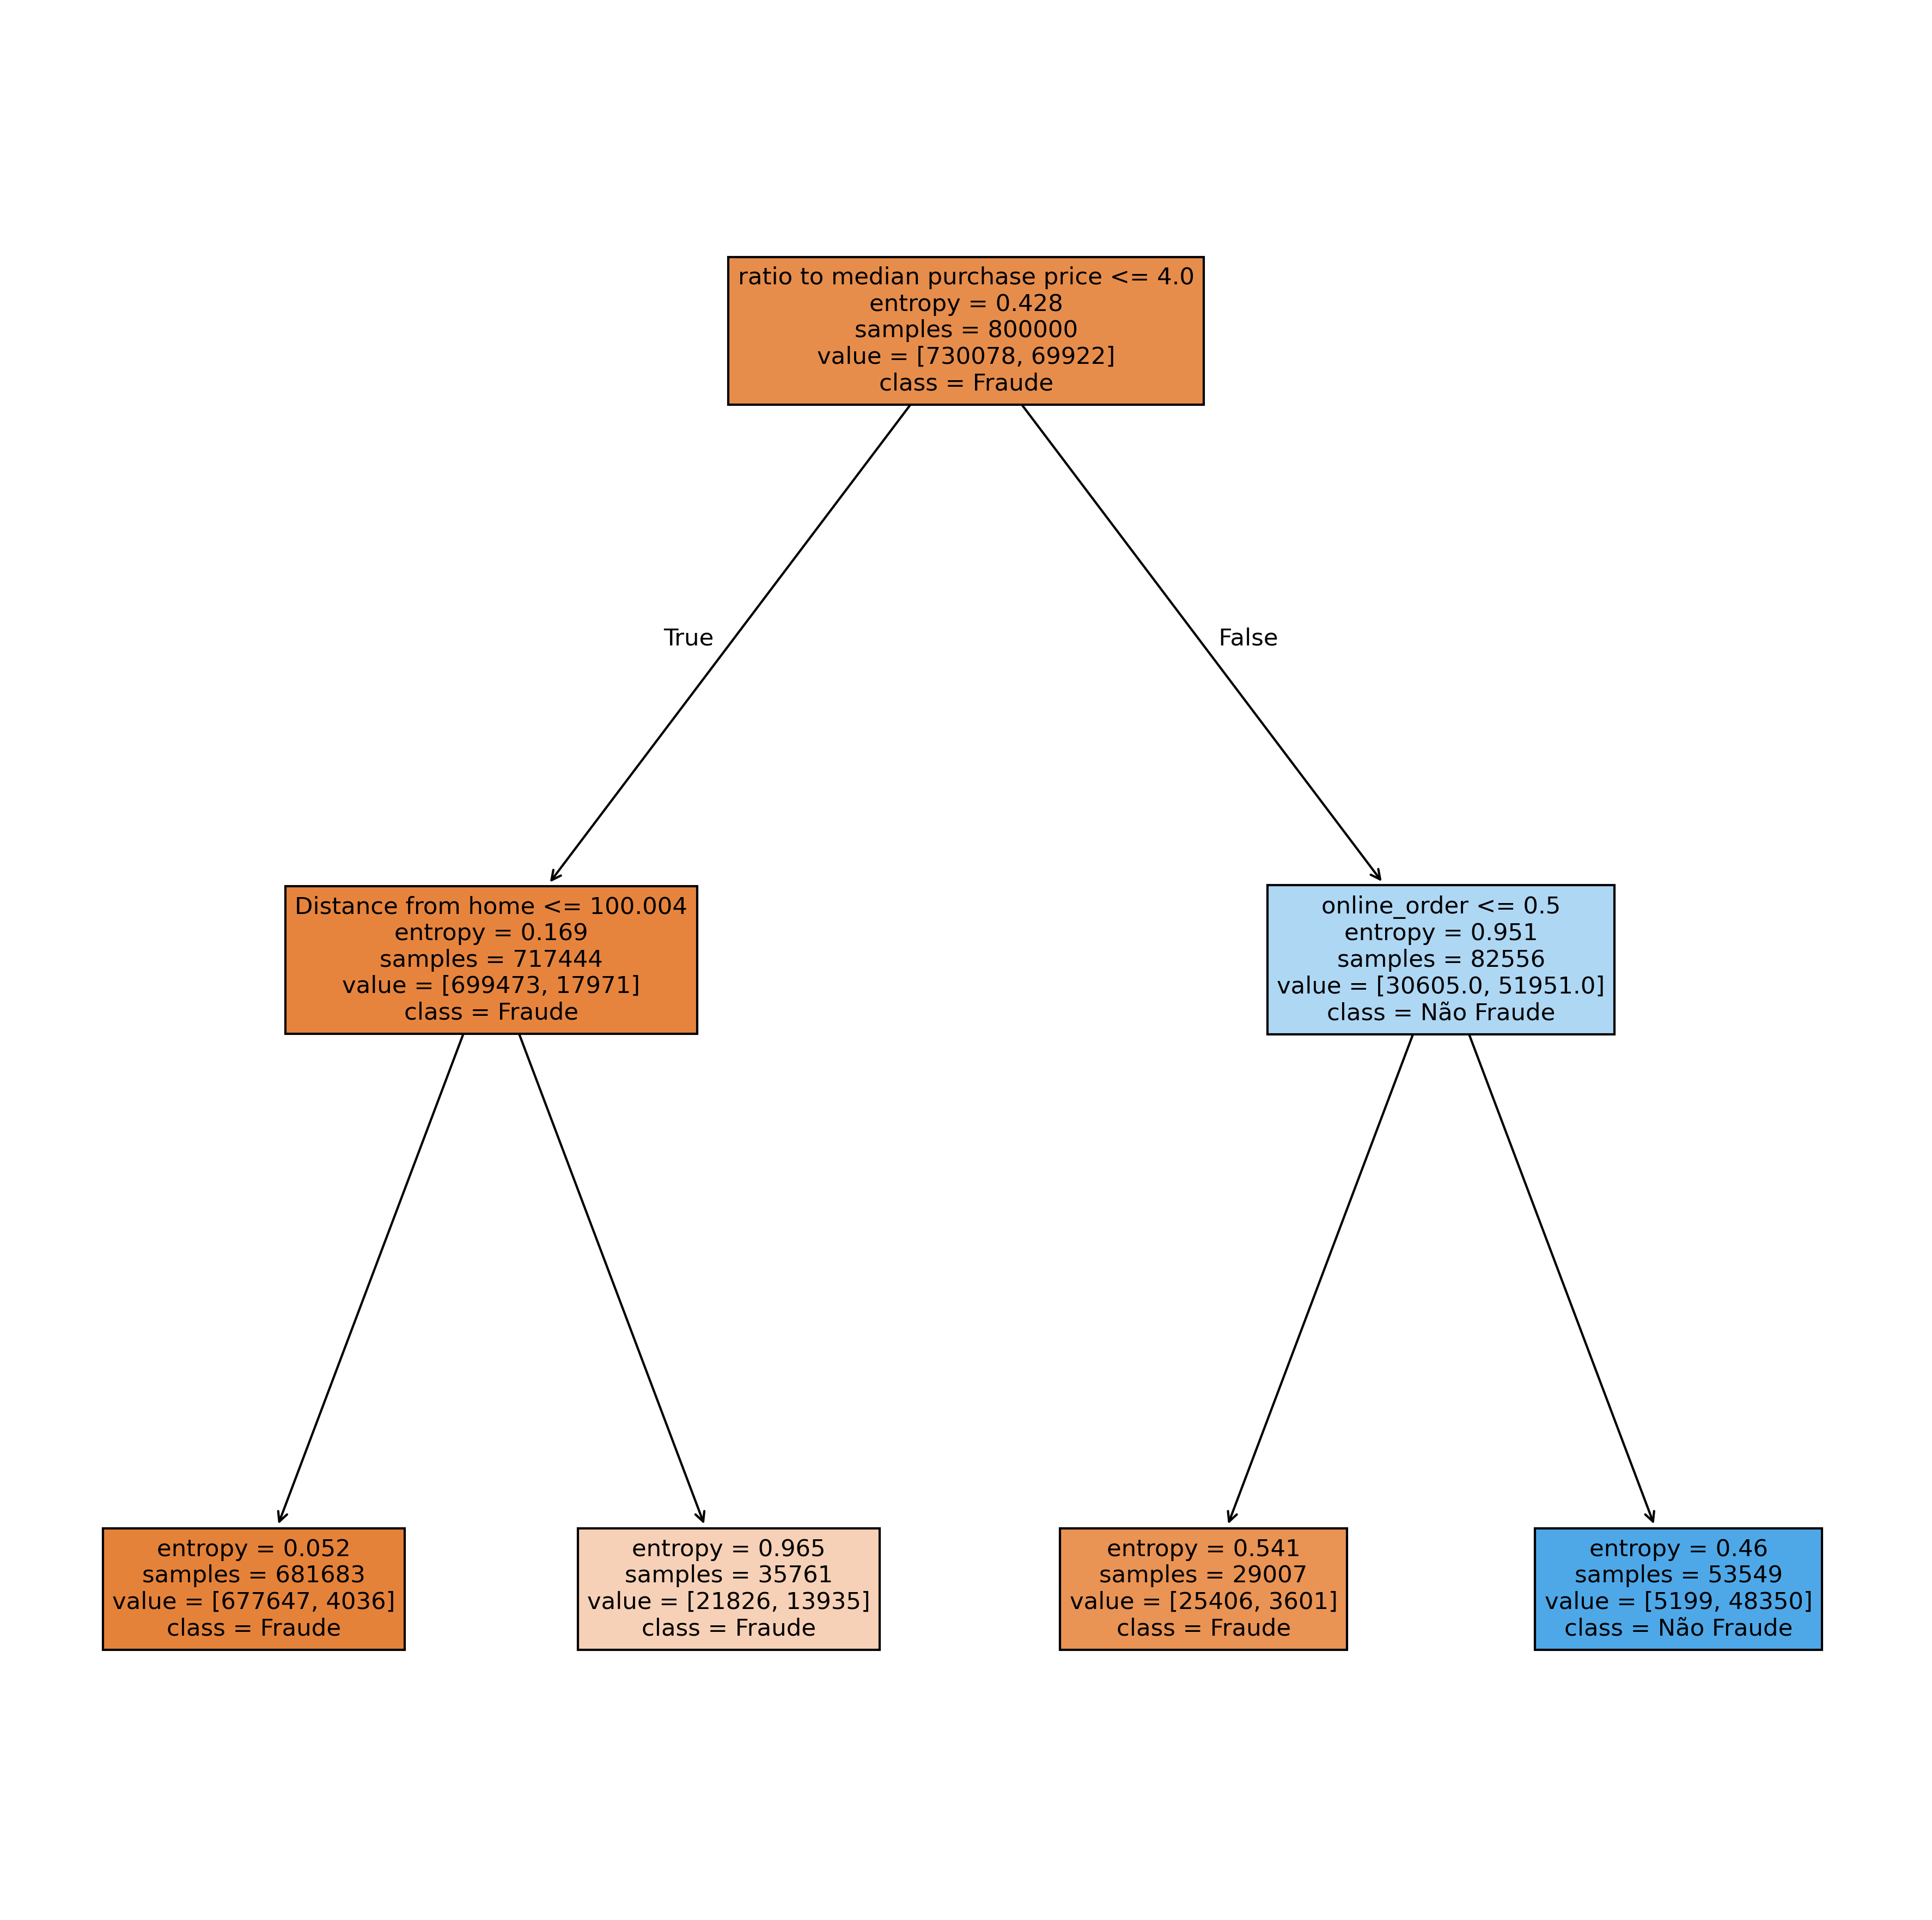

In [121]:
class_names = ['Fraude', 'Não Fraude']
label_names = ['Distance from home', 'distance from last transaction', 'ratio to median purchase price', 'repeat retailer', 'used chip', 'used pin number', 'online_order']

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (15,15), dpi=300)
tree.plot_tree(dt,
               feature_names = label_names,
               class_names=class_names,
               filled = True);

fig.savefig('imagename.png')

In [125]:
# Metricas de precisão, revocação, f1-score e acurácia

print(accuracy_score(y_test, y_predito))
print(recall_score(y_test, y_predito))
print(precision_score(y_test, y_predito))
print(f1_score(y_test, y_predito))

0.96675
0.6936102053658257
0.9035695655413966
0.7847896440129449


### Random Forest

In [126]:
rf = RandomForestClassifier(n_estimators=5, random_state=7, max_depth = 2)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=5, random_state=7)

In [127]:
estimator = rf.estimator_

In [128]:
y_predito_random_forest = rf.predict(x_test)

In [129]:
# Métricas de precisão, revocação, f1-score e acurácia.
print(accuracy_score(y_test, y_predito_random_forest))
print(recall_score(y_test, y_predito_random_forest))

0.95339
0.46673531262513585


In [138]:
class_names = ['Fraude', 'Não Fraude']
label_names = ['Distance from home', 'distance from last transaction', 'ratio to median purchase price', 'repeat retailer', 'used chip', 'used pin number', 'online_order']

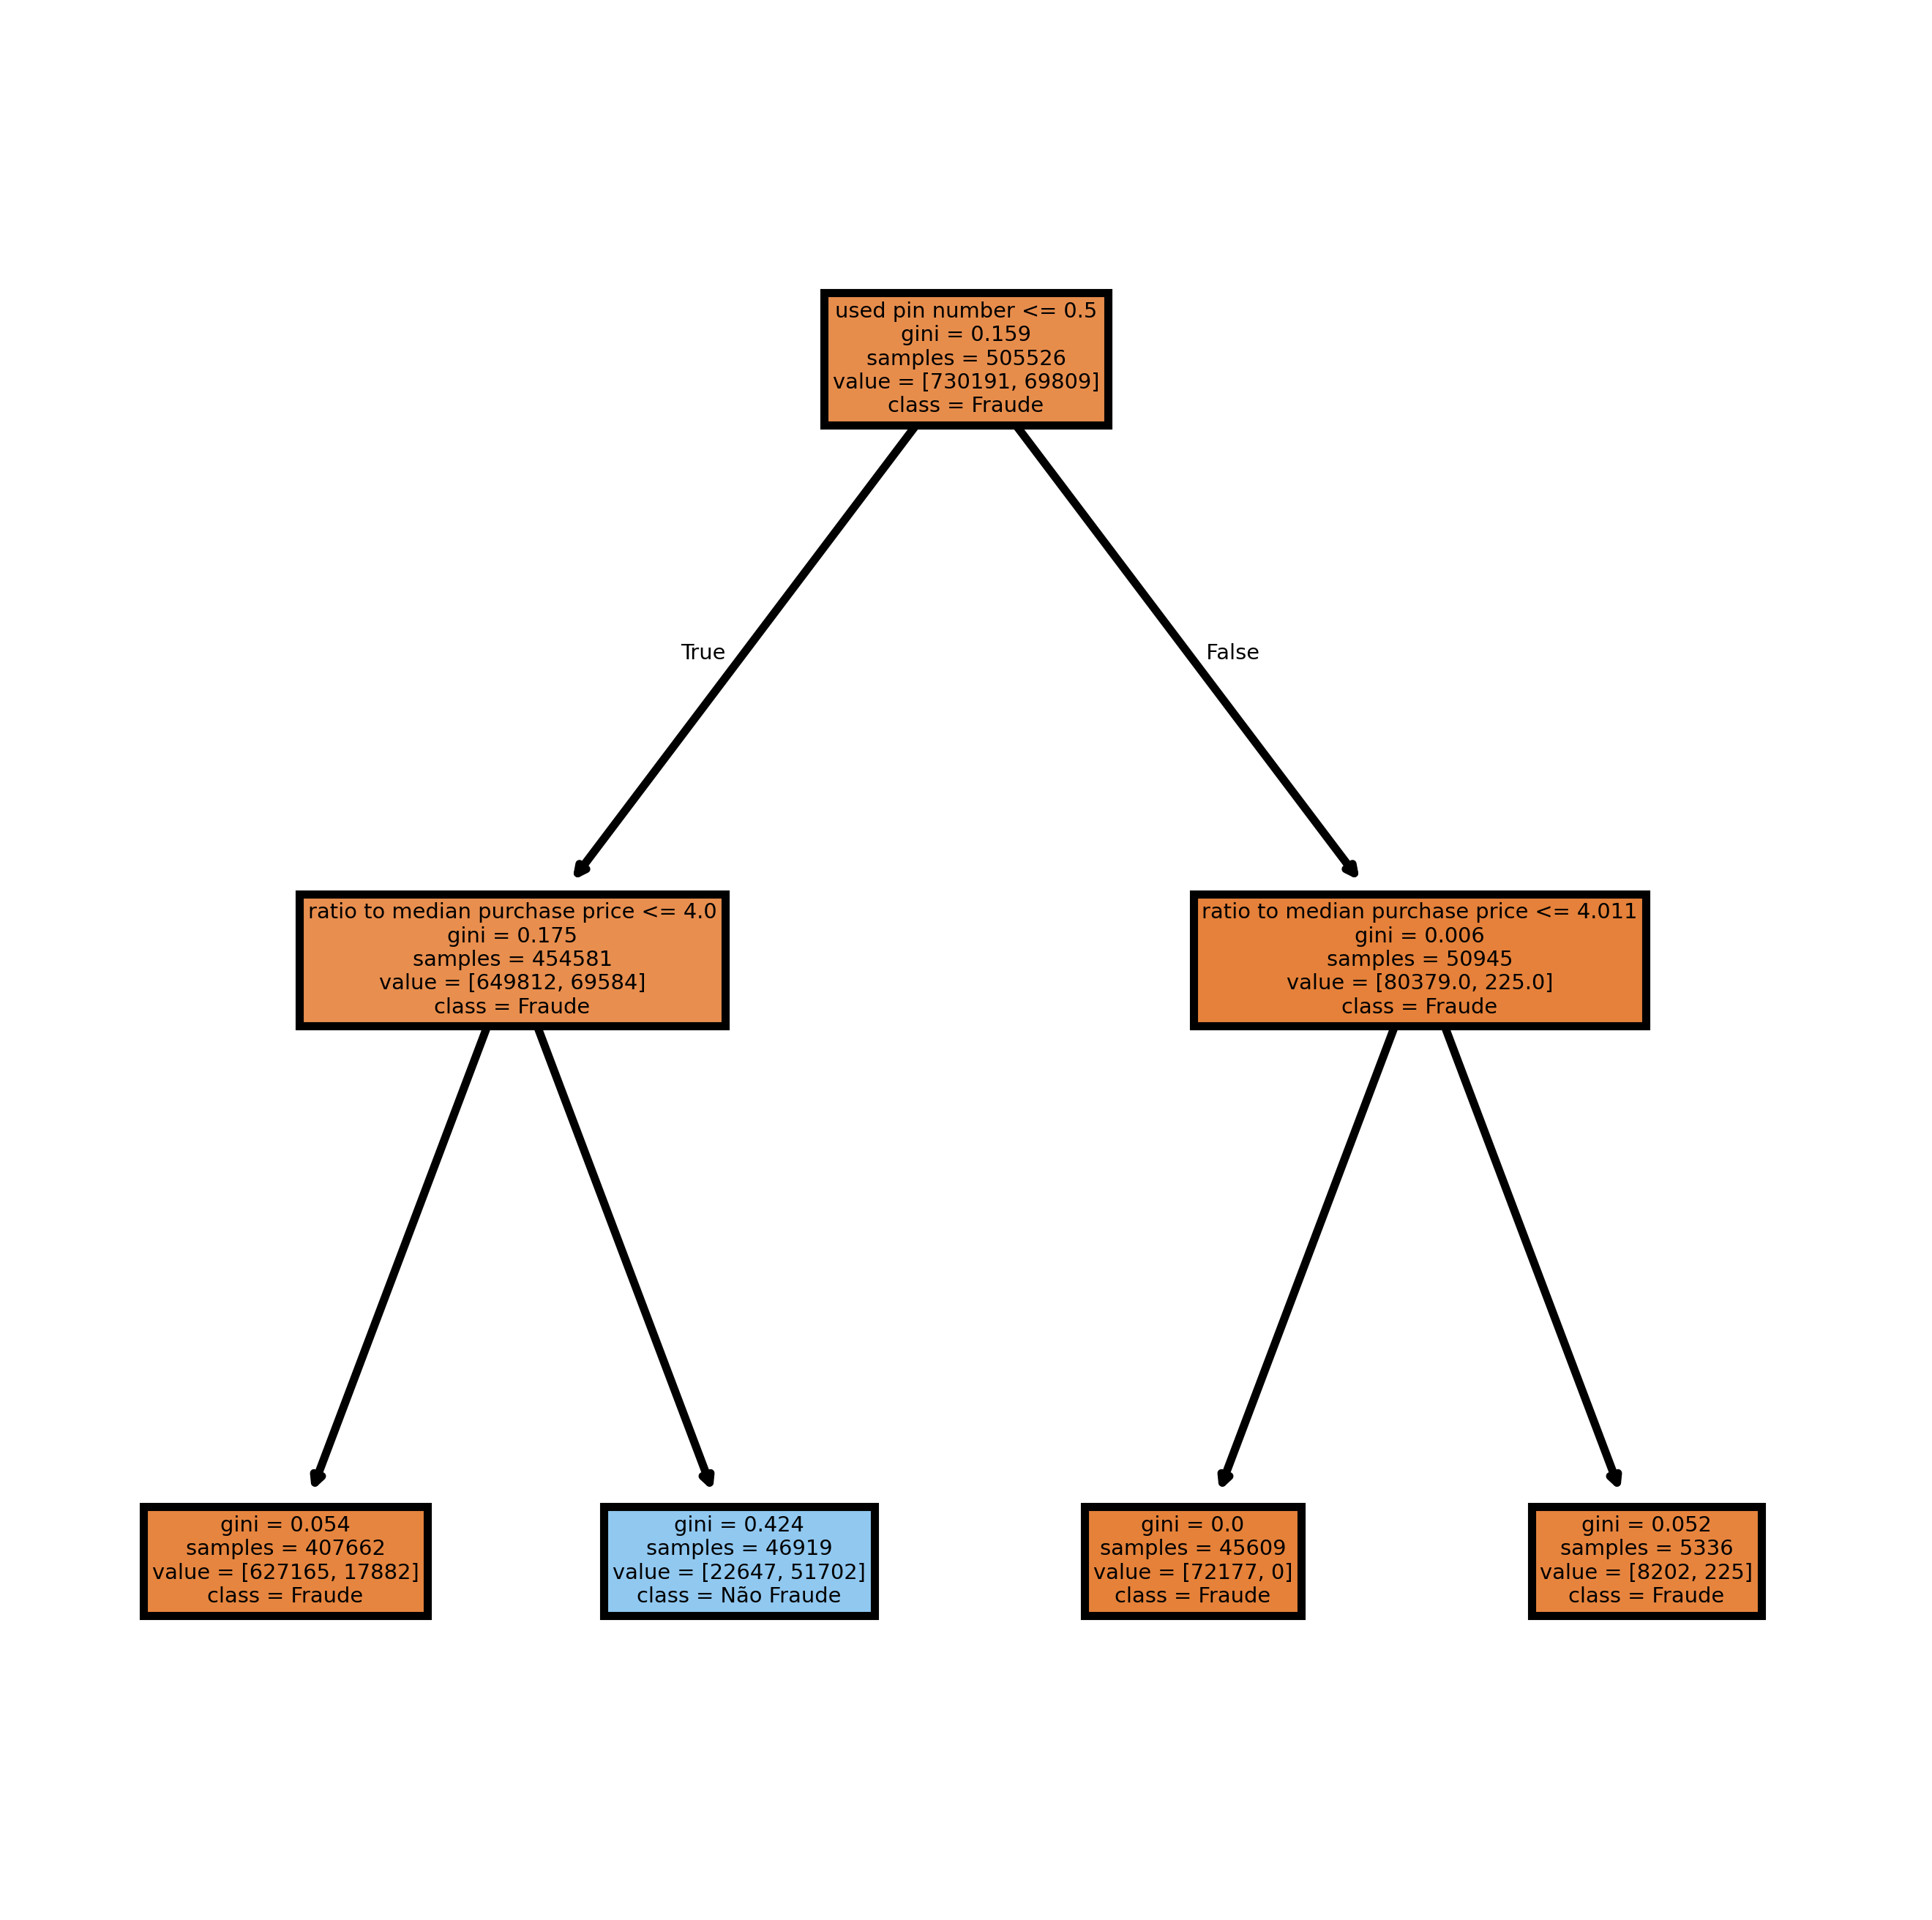

In [141]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi=800)
tree.plot_tree(rf.estimators_[0],
               feature_names = label_names,
               class_names=class_names,
               filled = True);
fig.savefig('rf_individualtree.png')

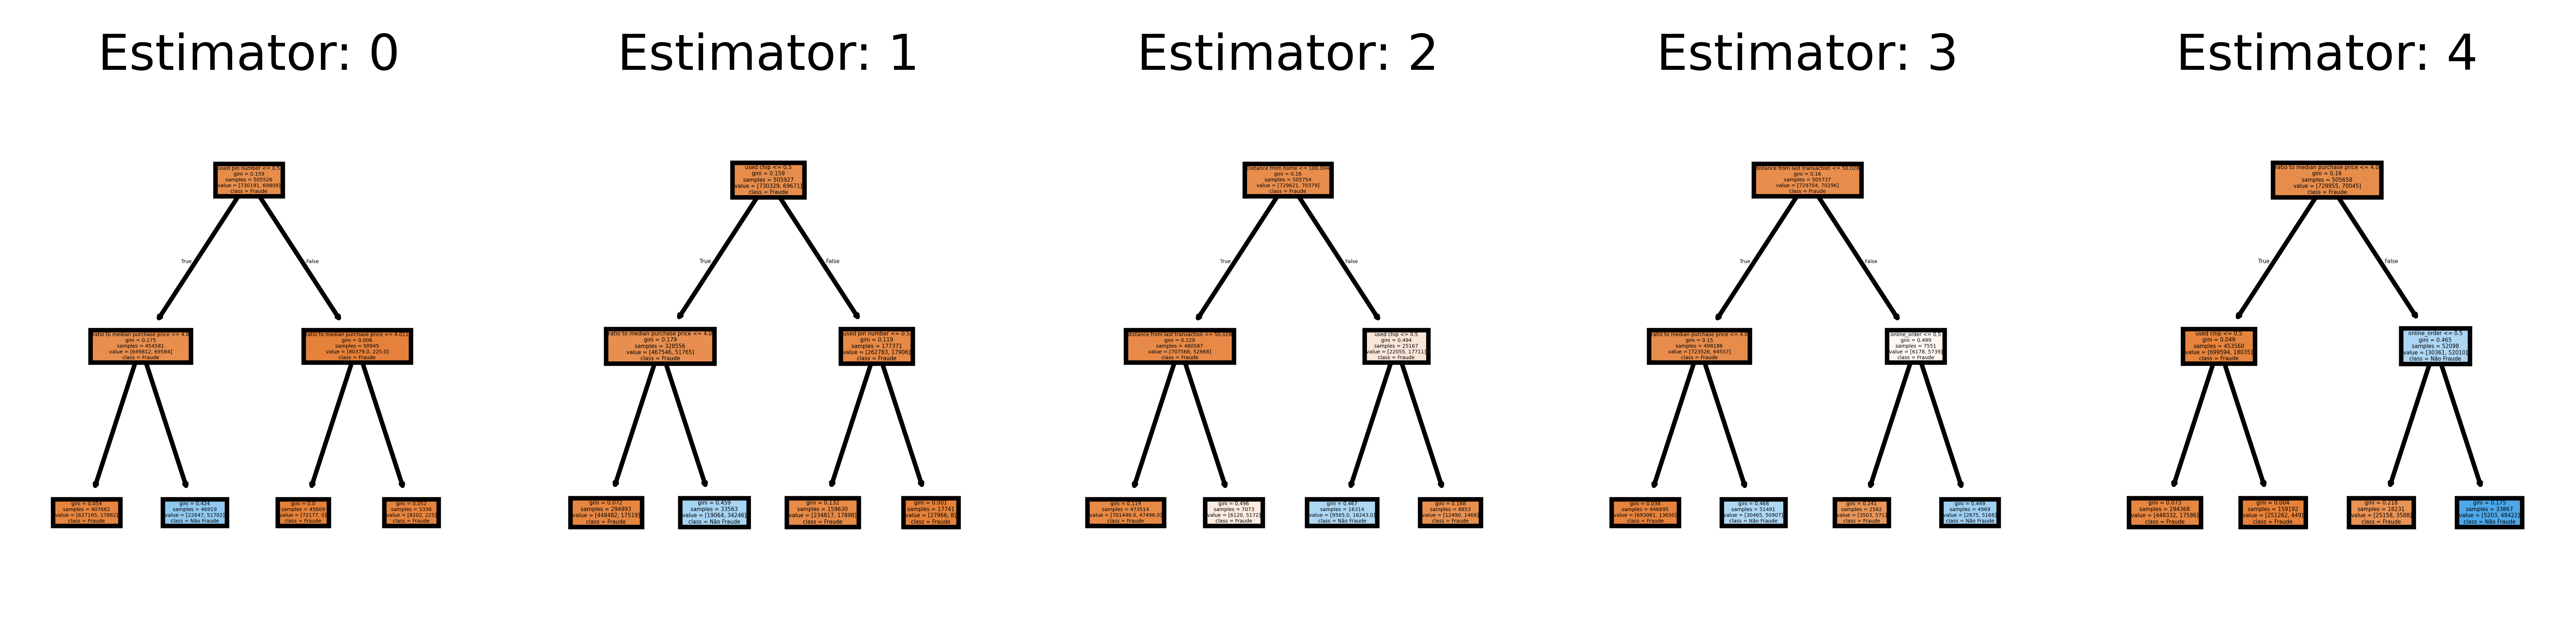

In [143]:
# Plotando todas as árvores
fig, axes = plt.subplots(nrows = 1, ncols = 5, figsize = (10,2), dpi=900)
for index in range(0, 5):
    tree.plot_tree(rf.estimators_[index],
                   feature_names = label_names,
                   class_names = class_names,
                   filled=True,
                   ax=axes[index]);
    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
fig.savefig('rf_5trees.png')


In [144]:
print(rf.score(x_train, y_train))
print(rf.score(x_test, y_test))

0.95321875
0.95339
